In [1]:
import scipy
obj = scipy.io.loadmat('mt2files/regress2.mat')
D = obj['D']

### a)

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [307]:
x, y, z = D.T
X = np.reshape(x, (30, 30))
Y = np.reshape(y, (30, 30))
Z = np.reshape(z, (30, 30))

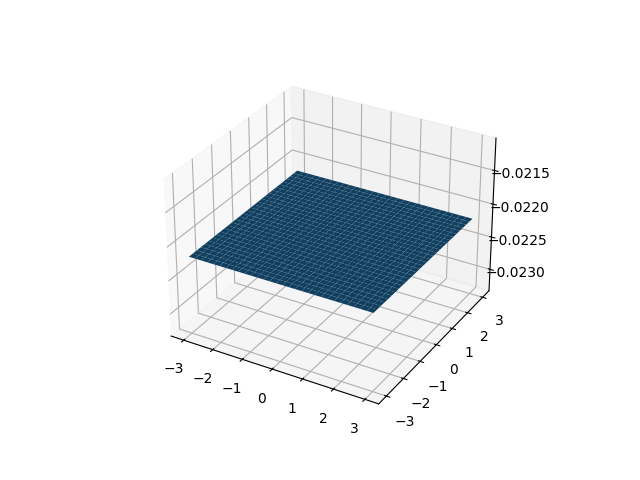

In [305]:
%matplotlib widget
plt.clf()
ax = plt.subplot(projection='3d')
ax.plot_surface(X, Y, Z)
plt.show()

### b)

In [266]:
def solve(X):
    U, S, Vt = np.linalg.svd(X)
    
    n = X.shape[1]
    inds = np.arange(n)
    S_inv = np.zeros((n, 900))
    S_inv[inds, inds] = 1 / S
    
    X_inv = np.dot(Vt.T, np.dot(S_inv, U.T))
    beta = np.squeeze(np.dot(X_inv, z))
    return bet

In [278]:
x, y, z = D.T
n = len(x)

0th order: regressor is just a constant $\vec{\beta_0}$. Its error is minimized at the mean of Z.

In [282]:
X0 = np.ones((n, 1))
beta_0 = solve(X0)
beta_0

array(-0.02218021)

1st order regressor has the form $\vec\beta_0 + \vec\beta_1x + \vec\beta_2y$.

In [284]:
X1 = np.array([np.ones(n), x, y]).T
beta_1 = solve(X1)
beta_1

array([-0.02218021,  0.00621269,  0.00624989])

2nd order regressor: $\vec\beta_0 + \vec\beta_1x + \vec\beta_2y + \vec\beta_3x^2 + \vec\beta_3xy + \vec\beta_3y^2$.

In [287]:
X2 = np.array([np.ones(n), x, y, x ** 2, x * y, y ** 2]).T
beta_2 = solve(X2)
beta_2

array([-1.97707332e-02,  6.21268937e-03,  6.24989215e-03, -9.74152803e-05,
       -1.54639853e-02, -6.53927722e-04])

3rd order regressor: $\vec\beta_0 + \vec\beta_1x + \vec\beta_2y + \vec\beta_3x^2 + \vec\beta_3xy + \vec\beta_3y^2 + \vec\beta_2x^3 + \vec\beta_3x^2y + \vec\beta_3xy^2 + \vec\beta_3y^3$.

In [291]:
X3 = np.array([
    np.ones(n), x, y,
    x ** 2, x * y, y ** 2,
    x ** 3, x ** 2 * y, x * y ** 2, y ** 3
]).T
beta_3 = solve(X3)
beta_3

array([-1.97707332e-02,  2.22461394e-02,  5.72997159e-03, -9.74152803e-05,
       -1.54639853e-02, -6.53927722e-04, -2.87107447e-03,  1.34375340e-04,
        1.60591357e-04,  1.54398032e-05])

### c)

In [304]:
z0 = np.dot(X0, beta_0)
z1 = np.dot(X1, beta_1)
z2 = np.dot(X2, beta_2)
z3 = np.dot(X3, beta_3)
Z0 = np.reshape(z0, (30, 30))
Z1 = np.reshape(z1, (30, 30))
Z2 = np.reshape(z2, (30, 30))
Z3 = np.reshape(z3, (30, 30))

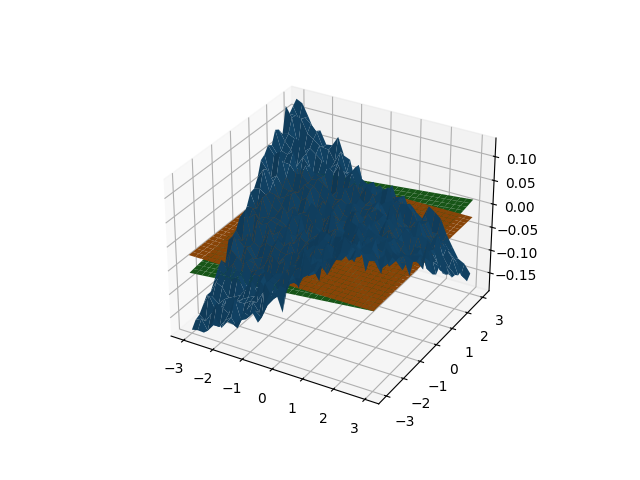

In [315]:
%matplotlib widget
plt.clf()
ax = plt.subplot(projection='3d')
ax.plot_surface(X, Y, Z)
ax.plot_surface(X, Y, Z0)
ax.plot_surface(X, Y, Z1)
plt.show()

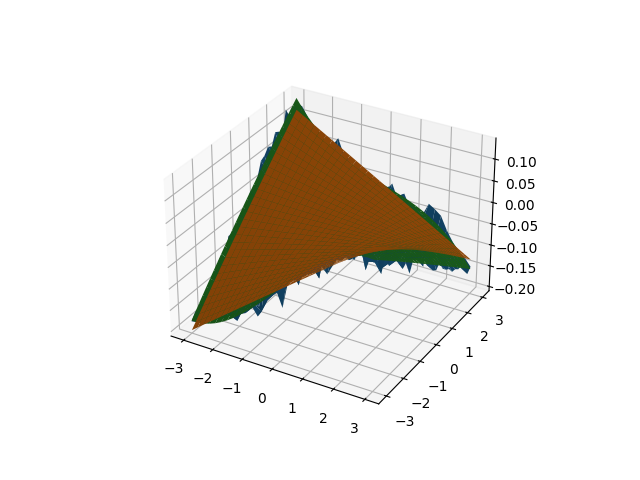

In [316]:
%matplotlib widget
plt.clf()
ax = plt.subplot(projection='3d')
ax.plot_surface(X, Y, Z)
ax.plot_surface(X, Y, Z2)
ax.plot_surface(X, Y, Z3)
plt.show()